## Importing the Dependencies

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [173]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Collection & Processing

In [174]:
# load the data from csv file to Pandas DataFrame
titanic_data = pd.read_csv('titanic.csv')

In [175]:
# printing the first 5 rows of the dataframe
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [176]:
# number of rows and Columns
titanic_data.shape

(891, 12)

In [177]:
# getting some informations about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [178]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Handling the Missing Values

In [179]:
# drop the "Cabin" column from the dataframe
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [180]:
# replacing the missing values in "Age" column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [181]:
# finding the mode value of "Embarked" column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [182]:
print(titanic_data['Embarked'].mode()[0])

S


In [183]:
# replacing the missing values in "Embarked" column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [184]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Data Analysis 

In [185]:
# getting some statistical measures about the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [186]:
# finding the number of people survived and not survived
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## Data Visualization

In [187]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

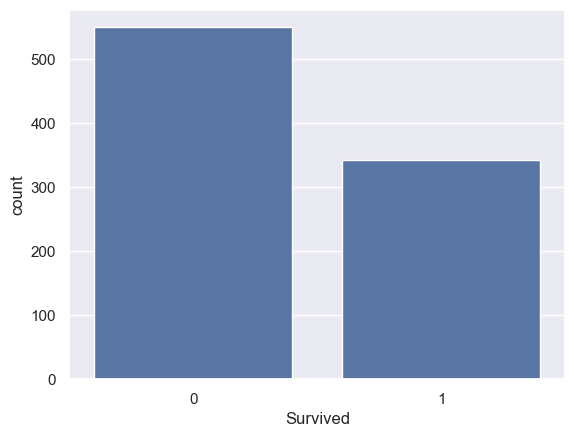

In [188]:
# making a count plot for "Survived" column
sns.countplot(x='Survived', data=titanic_data)

In [189]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

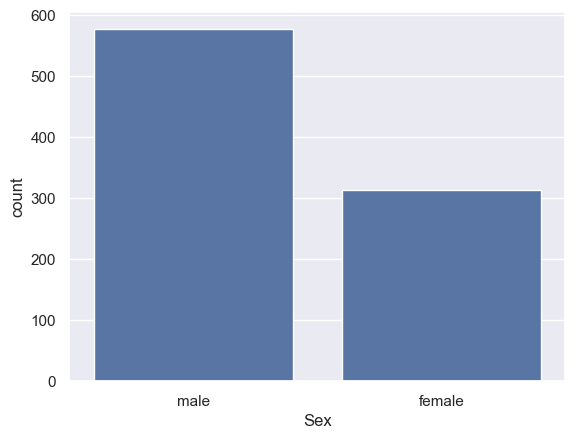

In [190]:
# making a count plot for "Sex" column
sns.countplot(x='Sex', data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

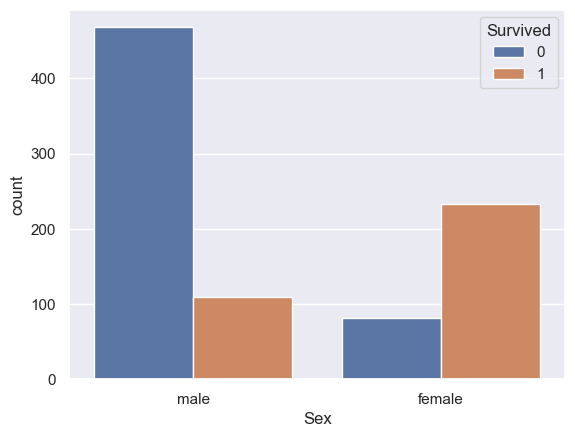

In [191]:
# number of survivors Gender wise
sns.countplot(x='Sex', hue='Survived', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

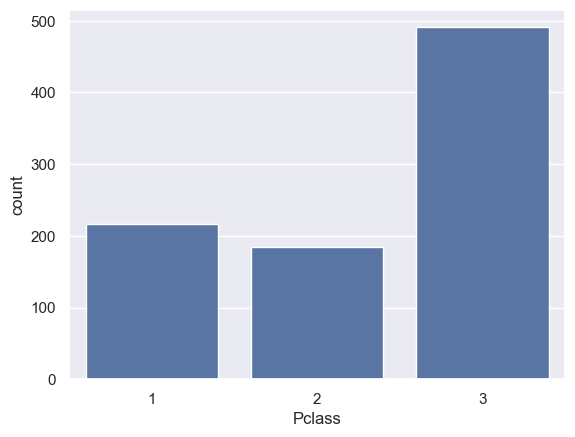

In [192]:
# making a count plot for "Pclass" column
sns.countplot(x='Pclass', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

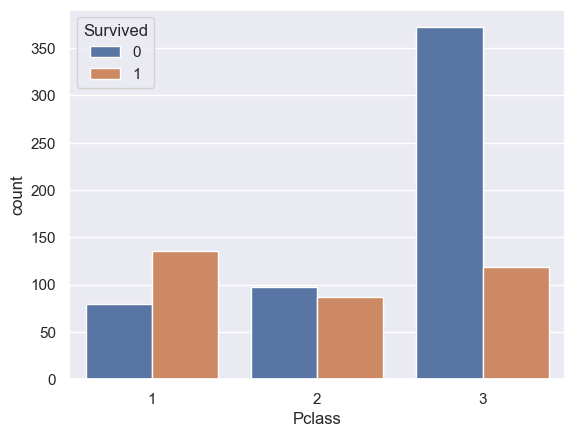

In [193]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

## Encoding the Categorical Columns

In [194]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [195]:
titanic_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [204]:
# converting categorical columns
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [205]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


## Separating features & Target

In [206]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [207]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [208]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


## Splitting the data into training data & Test data

In [209]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [210]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


## Scaling 

In [211]:
from sklearn.preprocessing import StandardScaler

# Scale features (important for SVM and Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training

In [216]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1],
        'solver': ['lbfgs'],
        'max_iter': [1000]
    },
    'Random Forest': {
        'n_estimators': [100, 500],
        'max_depth': [5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'Decision Tree': {
        'max_depth': [5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'SVM': {
        'C': [0.1, 1],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale'],
        'degree': [3]
    }
}

# Placeholder for storing best models
best_estimators = {}

# Perform grid search and store best models
# Logistic Regression
grid_lr = GridSearchCV(LogisticRegression(), param_grids['Logistic Regression'], cv=5)
grid_lr.fit(X_train_scaled, Y_train)
best_estimators['Logistic Regression'] = grid_lr.best_estimator_

# Random Forest
grid_rf = GridSearchCV(RandomForestClassifier(), param_grids['Random Forest'], cv=5)
grid_rf.fit(X_train, Y_train)
best_estimators['Random Forest'] = grid_rf.best_estimator_

# Decision Tree
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grids['Decision Tree'], cv=5)
grid_dt.fit(X_train, Y_train)
best_estimators['Decision Tree'] = grid_dt.best_estimator_

# SVM
grid_svm = GridSearchCV(SVC(), param_grids['SVM'], cv=5)
grid_svm.fit(X_train_scaled, Y_train)
best_estimators['SVM'] = grid_svm.best_estimator_

## Model Evaluation

### Accuracy Score

In [217]:
# Prepare to store accuracy results
results = []

# Evaluate each model
for name, model in best_estimators.items():
    # Select appropriate data
    if name in ['Logistic Regression', 'SVM']:
        X_tr, X_te = X_train_scaled, X_test_scaled
    else:
        X_tr, X_te = X_train, X_test

    # Fit the model
    model.fit(X_tr, Y_train)

    # Predict and evaluate
    y_train_pred = model.predict(X_tr)
    y_test_pred = model.predict(X_te)

    train_acc = accuracy_score(Y_train, y_train_pred)
    test_acc = accuracy_score(Y_test, y_test_pred)

    # Store results
    results.append({
        'Model': name,
        'Training Accuracy': train_acc,
        'Test Accuracy': test_acc
    })

# Print the comparison
for res in results:
    print(f"{res['Model']}:")
    print(f"  Training Accuracy: {res['Training Accuracy']:.4f}")
    print(f"  Test Accuracy: {res['Test Accuracy']:.4f}\n")

Logistic Regression:
  Training Accuracy: 0.8146
  Test Accuracy: 0.7821

Random Forest:
  Training Accuracy: 0.8694
  Test Accuracy: 0.7933

Decision Tree:
  Training Accuracy: 0.8539
  Test Accuracy: 0.7709

SVM:
  Training Accuracy: 0.8567
  Test Accuracy: 0.7877



## Saving the Model

In [239]:
import joblib
joblib.dump(best_estimators['Random Forest'], 'best_random_forest_model.pkl')

['best_random_forest_model.pkl']

## Testing with some input data 

In [244]:
import pandas as pd

def predict_survival(input_features, model, feature_names):
    """
    Predicts survival outcome based on input features using the provided model.
    
    Parameters:
    - input_features: list of feature values in the correct order.
    - model: trained model object.
    - feature_names: list of feature names used during training.
    
    Returns:
    - str: 'Survived' or 'Did not survive' based on prediction.
    """
    import numpy as np
    
    # Convert input features to DataFrame with feature names
    input_df = pd.DataFrame([input_features], columns=feature_names)
    
    # Make prediction
    prediction = model.predict(input_df)[0]
    
    # Interpret the prediction
    if prediction == 1:
        return 'Survived'
    else:
        return 'Did not survive'

In [245]:
# Assume these are your feature names
feature_names = X.columns.tolist()

# Your sample input
sample_input = [-1.55247675, -0.74242727, 0.8049402, -0.4668076, -0.4841652, -0.09393818, 0.92568406]

# Make prediction
result = predict_survival(sample_input, best_estimators['Random Forest'], feature_names)
print(result)

Survived


In [249]:
# Assume these are your feature names
feature_names = X.columns.tolist()

# Your sample input
sample_input = [-0.35877972, -0.74242727,  0.09692947, -0.4668076,  -0.4841652,  -0.44805376, -0.59998041]

# Make prediction
result = predict_survival(sample_input, best_estimators['Random Forest'], feature_names)
print(result)

Did not survive
